# DATA ANALYSIS OF BIRTH NOTIFICATION DATASET IN DUBAI

## Import the Required Modules

In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

## Read the data

In [413]:
birth = pd.read_csv('C:\\Users\\Samieh\\PycharmProjects\\Birth\\Birth_Notification.csv')
birth.head()

,source_system_name,facility_code,facility_name,sex_code,sex,order_of_birth_in_family_for_mother,place_of_birth,father_religion_code,father_religion,mother_religion_code,mother_religion
0,SALAMA,1010301,LATIFA WOMEN AND CHILDREN HOSPITAL,1.0,Female,2.0,DUBAI,NaN,NaN,10,Muslim
1,SALAMA,1010301,LATIFA WOMEN AND CHILDREN HOSPITAL,2.0,Male,1.0,DUBAI,NaN,NaN,10,Muslim
2,SALAMA,1010201,DUBAI HOSPITAL,1.0,Female,2.0,DUBAI,NaN,NaN,10,Muslim
3,SALAMA,1010401,HATTA HOSPITAL,2.0,Male,2.0,DUBAI,NaN,NaN,10,Muslim
4,SALAMA,1010201,DUBAI HOSPITAL,2.0,Male,2.0,DUBAI,NaN,NaN,10,Muslim


In [414]:
birth.keys()

Index(['source_system_name', 'facility_code', 'facility_name', 'sex_code',
       'sex', 'order_of_birth_in_family_for_mother', 'place_of_birth',
       'father_religion_code', 'father_religion', 'mother_religion_code',
       'mother_religion'],
      dtype='object')

In [415]:
np.shape(birth)

(12299, 11)

In [416]:
birth.dtypes

source_system_name                      object
facility_code                            int64
facility_name                           object
sex_code                               float64
sex                                     object
order_of_birth_in_family_for_mother    float64
place_of_birth                          object
father_religion_code                   float64
father_religion                         object
mother_religion_code                    object
mother_religion                         object
dtype: object

## Data Cleaning
Let's see which columns contain missing values in the Dataframe.

In [417]:
birth.isnull().any()

source_system_name                     False
facility_code                          False
facility_name                          False
sex_code                                True
sex                                     True
order_of_birth_in_family_for_mother     True
place_of_birth                         False
father_religion_code                    True
father_religion                         True
mother_religion_code                    True
mother_religion                         True
dtype: bool

Seven categories contain null values.

In [418]:
birth['sex_code'].isnull().sum()

3

In [419]:
np.where(birth['sex_code'].isnull())

(array([6032, 6411, 6968], dtype=int64),)

In [420]:
#sinse female is more distributed we fill our NaN values with female gender
birth['sex_code'].fillna(1.0, inplace=True)

In [421]:
birth['sex_code'].isnull().sum()

0

In [422]:
birth['sex_code'].iloc[6032]

1.0

We replaced our 6032 index value with female.

In [423]:
birth['sex'].fillna('Female', inplace=True)

In [424]:
birth.isnull().any()

source_system_name                     False
facility_code                          False
facility_name                          False
sex_code                               False
sex                                    False
order_of_birth_in_family_for_mother     True
place_of_birth                         False
father_religion_code                    True
father_religion                         True
mother_religion_code                    True
mother_religion                         True
dtype: bool

In [425]:
birth['order_of_birth_in_family_for_mother'].isnull().sum()

36

In [426]:
birth['order_of_birth_in_family_for_mother'].fillna('', inplace=True)

In [427]:
birth['order_of_birth_in_family_for_mother'].isnull().sum()

0

# Fill the missing values with mode
Fill the null values in mother_religion_code, mother_religion, father_religion and father_religion_code with mode. The mode of a set of data values is the value that appears most often.

In [456]:
# Fill the missing values with mode
for column in ['father_religion_code', 'mother_religion_code', 'mother_religion', 'father_religion']:
    birth[column].fillna(birth[column].mode()[0], inplace=True)

In [457]:
birth['father_religion_code'].isnull().sum()

0

Let's be sure we don't have null values:

In [459]:
birth.isnull().sum()

source_system_name                     0
facility_code                          0
facility_name                          0
sex_code                               0
sex                                    0
order_of_birth_in_family_for_mother    0
place_of_birth                         0
father_religion_code                   0
father_religion                        0
mother_religion_code                   0
mother_religion                        0
dtype: int64

Now we are finished with our null values.

# Data visualization

In [460]:
birth['sex_code'].value_counts()

2.0    6309
1.0    5986
3.0       4
Name: sex_code, dtype: int64

We know sex codes are defined as below:

1.0 for Males, 2.0 for Females and 3.0 for Male or Female (or mistyped)!

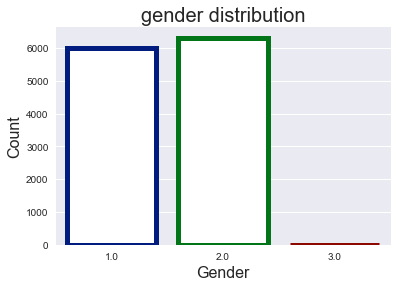

In [436]:
chart = sns.countplot(x='sex_code', data=birth, facecolor=(1,1,1,1),linewidth=5,edgecolor=sns.color_palette('dark',3))
chart.set_title("gender distribution", fontsize=20)
chart.set_xlabel("Gender",fontsize=16)
chart.set_ylabel("Count",fontsize=16)

In [437]:
birth['facility_name'].unique()

array(['LATIFA WOMEN AND CHILDREN HOSPITAL', 'DUBAI HOSPITAL',
       'HATTA HOSPITAL'], dtype=object)

We have 3 hospitals in our dataset.

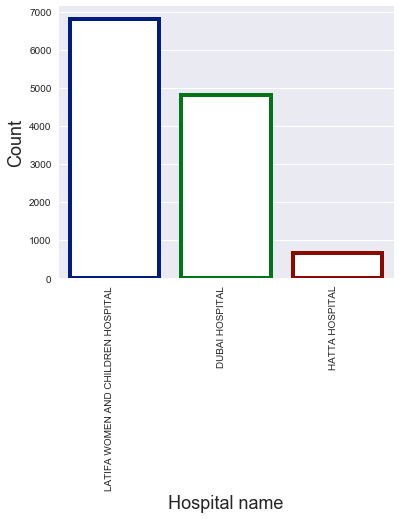

In [438]:
plt.figure(figsize=(6,5))
chart = sns.countplot(x='facility_name', data=birth, facecolor=(1,1,1),edgecolor=sns.color_palette("dark",3),linewidth=4)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.set_xlabel("Hospital name",fontsize=18)
chart.set_ylabel("Count",fontsize=18)

In [439]:
birth['place_of_birth'].unique()
#Not a surprise!!

array(['DUBAI'], dtype=object)

In [461]:
#uniqueness of reliogions
birth['mother_religion'].unique()

array(['Muslim', 'Hindu', 'Unknown', 'Jain', 'Christian', 'None',
       'Catholic', 'Nazarene', 'Other', 'Sikh', 'Buddhist', 'Shinto',
       'Episcopalian', 'Methodist'], dtype=object)

In [462]:
#uniqueness of reliogions
birth['father_religion'].value_counts()

Muslim       12070
Christian      153
Other           64
Unknown          9
Hindu            3
Name: father_religion, dtype: int64

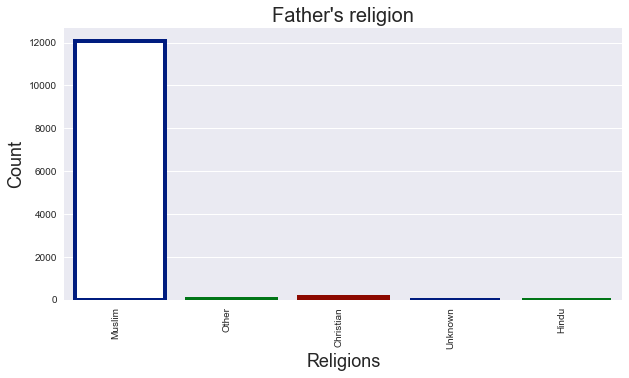

In [463]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='father_religion', data=birth, facecolor=(1,1,1),edgecolor=sns.color_palette("dark",3),linewidth=4)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.set_title("Father's religion", fontsize=20)
chart.set_xlabel("Religions",fontsize=18)
chart.set_ylabel("Count",fontsize=18)

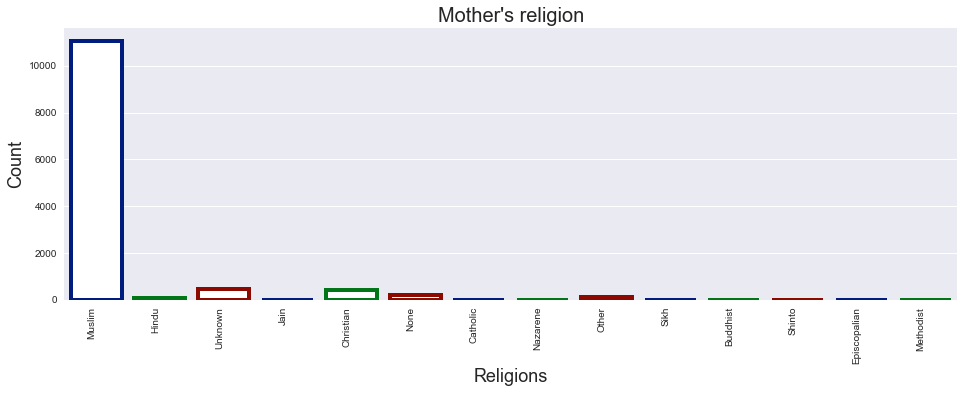

In [464]:
plt.figure(figsize=(16,5))
chart = sns.countplot(x='mother_religion', data=birth, facecolor=(1,1,1),edgecolor=sns.color_palette("dark",3),linewidth=4)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
chart.set_title("Mother's religion", fontsize=20)
chart.set_xlabel("Religions",fontsize=18)
chart.set_ylabel("Count",fontsize=18)

Well most of children were born from Muslim parents. 